In [5]:
import pandas as pd #Data Manipulation and Analysis
import matplotlib.pyplot as plt #plotting
# magic command
%matplotlib widget  
import numpy as np #for working with arrays 
import seaborn as sns #interactive data visulaization base on matplotlib
import warnings
warnings.filterwarnings('ignore')
import re
from time import time #Timing our operations
import collections 
from collections import defaultdict
import spacy #spaCy is a free, open-source library for NLP in Python.
from gensim.models import Word2Vec #NLP functionality 
import logging
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s",datefmt = '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE #tool to visualize high dimensional data
from numpy import dot #dotproduct
from numpy.linalg import norm #linear algebra ...matrix norms

In [4]:
pip install ipympl

     ------------------------------------ 511.6/511.6 kB 377.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Data Set Import 
df = pd.read_csv('car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [11]:
df.shape

(11914, 16)

Gensim uses list of lists for its working. For this purpose the make and model of the car are combined into one and then other features will also be clubbed in respective list. Once, list for all individual cars are completed, all these lists will be combined into one single list and further processing is done.



In [12]:
df['Maker_Model'] = df['Make']+" "+df['Model']


In [13]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Maker_Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW 1 Series
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW 1 Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,Acura ZDX
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,Acura ZDX
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,Acura ZDX
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,Acura ZDX


In [14]:
df.shape

(11914, 17)

In [15]:
#All the columns containing text are chosen and put in a new dataframe df1
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style', 'Maker_Model']]
print(df1.shape)
df1.head()

(11914, 7)


,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [16]:
#All the columns combined into one column in df2 dataframe
df2 = df1.apply(lambda x: ','.join(x.astype(str)),axis = 1)
print(df2.shape)
df2.head()

(11914,)


0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [17]:
#a new pandas dataframe is created of name df_clean containing column clean
df_clean = pd.DataFrame({'clean':df2}) 
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [18]:
df_clean.shape

(11914, 1)

In [19]:
#List of list data corpus for Gensim modelling
sent = [row.split(',') for row in df_clean['clean']]
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

Word Embedding is implemented using Word2Vec technique. It uses two-layer neural network. Input for this is text and output is a set of vectors. Gensim library on the custom corpus is implemented using algorithms like CBOW(Continuous Bag of Words), SG(Skip Gram). Training model is created as below.



In [20]:
model = Word2Vec(sent,min_count =1,vector_size=50, workers = 3,window=3,sg=1)


INFO - 12:58:18: collecting all words and their counts
INFO - 12:58:18: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:58:18: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 12:58:18: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 12:58:18: Creating a fresh vocabulary
INFO - 12:58:18: Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 977 unique words (100.0%% of original 977, drops 0)', 'datetime': '2023-12-15T12:58:18.171663', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
INFO - 12:58:18: Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 88129 word corpus (100.0%% of original 88129, drops 0)', 'datetime': '2023-12-15T12:58:18.171663', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 

size: The number of dimensions of the embeddings and the default is 100.
window: The maximum distance between a target word and words around the target word. The default window is 5.
min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
workers: The number of partitions during training and the default workers is 3.
sg: The training algorithm, either CBOW(0) or skip gram (1). The default training alogrithm is CBOW

In [21]:
model.wv['Toyota Camry']


array([ 1.85325323e-03,  1.16461165e-01,  4.30997787e-03, -7.90415406e-02,
       -6.96254075e-02, -1.89020514e-01,  3.38694006e-02,  2.64893025e-01,
       -8.58711451e-02, -7.48889148e-02,  6.13748245e-02,  3.63444537e-02,
        1.02459073e-01, -2.27477457e-02, -4.53676321e-02,  1.64715365e-01,
        1.30257204e-01,  2.68872648e-01, -1.50483370e-01, -3.04074168e-01,
       -2.43345667e-02, -3.95686775e-02,  2.67431200e-01,  8.60506669e-02,
        1.70997694e-01, -5.01787523e-03, -2.88426504e-02,  3.69498342e-01,
       -6.21282607e-02, -1.10366754e-02,  2.24399753e-02,  2.87423916e-02,
        3.47920656e-02,  1.16033275e-02,  6.62695467e-02, -1.17411472e-01,
        1.88266575e-01,  1.08670443e-04,  6.46566525e-02,  6.23308420e-02,
        9.41671729e-02, -1.63788516e-02, -2.28202358e-01,  8.29880983e-02,
        3.77089828e-01,  7.15475082e-02, -2.09097285e-02, -1.49020627e-01,
        8.93008523e-03,  3.24451625e-02], dtype=float32)

# Compare Similarities

In [22]:
#Euclidean Similarity


In [23]:
print('Similarity b/w Porsche 718 Cayman & Nissan Van',model.wv.similarity('Porsche 718 Cayman', 'Nissan Van'))
print('Similarity b/w Porsche 718 Cayman & Mercedes-Benz SLK-Class',model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class'))

Similarity b/w Porsche 718 Cayman & Nissan Van 0.7019832
Similarity b/w Porsche 718 Cayman & Mercedes-Benz SLK-Class 0.8339507


In [24]:
print('Top 5 similar to Mercedes-Benz SLK-Class: \n',model.wv.most_similar(positive=["Mercedes-Benz SLK-Class"], topn = 5))

Top 5 similar to Mercedes-Benz SLK-Class: 
 [('Audi S3', 0.9896656274795532), ('Rolls-Royce Phantom', 0.9889098405838013), ('Subaru BRZ', 0.9885820150375366), ('BMW M', 0.9875590205192566), ('Acura CL', 0.9860835075378418)]


In [25]:
print('Top 5 similar to Toyota Camry: \n',model.wv.most_similar(['Toyota Camry'], topn = 5))


Top 5 similar to Toyota Camry: 
 [('Suzuki Kizashi', 0.9850293397903442), ('Kia Optima', 0.9849034547805786), ('Subaru Legacy', 0.9842114448547363), ('Chevrolet Cruze', 0.9819217324256897), ('Oldsmobile Cutlass Ciera', 0.9816539883613586)]


[Ref 1] Euclidian similarity cannot work well for the high-dimensional word vectors, This is because Euclidian similarity will increase the number of dimensions increases even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. Therefore, the cosine similarity captures the angle of the word vectors and not the magnitude. Under cosine similarity, no similarity is expressed as a 90-degree angle while the total similarity of 1 is at 0 degree angle.

In [26]:
def cosine_distance(model, word, target_list, num):
    cosine_dict = {}
    word_list = []
    a = model.wv[word]
    for item in target_list:
        if item != word:
            b = model.wv[item]
            cos_sim = dot(a,b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort = sorted(cosine_dict.items(), key = lambda dist: dist[1], reverse = True)
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [27]:
Maker_Model = list(df.Maker_Model.unique())
cosine_distance(model,'Mercedes-Benz SLK-Class', Maker_Model, 5)

[('Audi S3', 0.9896657),
 ('Rolls-Royce Phantom', 0.98890996),
 ('Subaru BRZ', 0.9885819),
 ('BMW M', 0.9875591),
 ('Acura CL', 0.98608357)]

T-SNE Plot
[Ref 1] T-SNE is an useful tool to visualize high-dimensional data by reducing dimensional space while keeping relative pairwise distance between points. It can be said that t-SNE looking for a new data representation where the neighborhood relations are preserved. T-SNE is an useful tool to visualize high-dimensional data by reducing dimensional space while keeping relative pairwise distance between points. It can be said that t-SNE looking for a new data representation where the neighborhood relations are preserved

In [28]:
def display_closestwowords_tsnescatterplot(model, word,size):
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]
    
    close_words = model.wv.similar_by_word(word)
    
    arr = np.append(arr, np.array([model.wv[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
    
    tsne = TSNE(n_components = 2, random_state = 0)
    np.set_printoptions(suppress = True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0,0), textcoords = 'offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()  

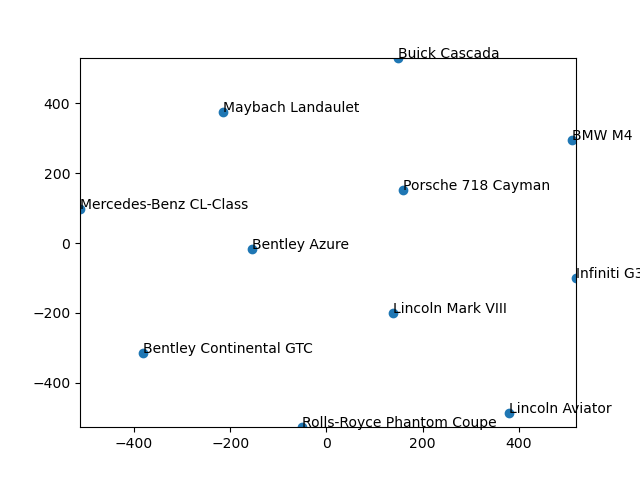

In [29]:
%matplotlib widget
display_closestwowords_tsnescatterplot(model, 'Porsche 718 Cayman', 50)